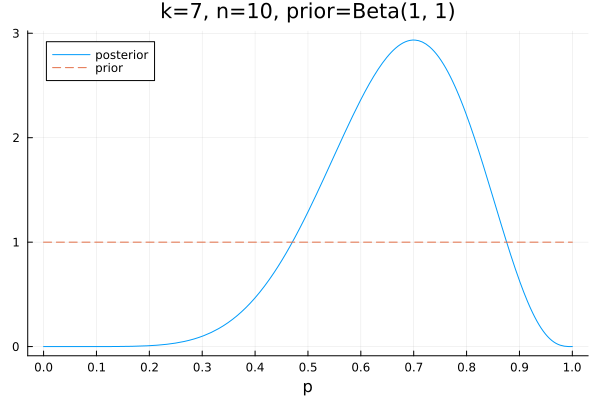

In [1]:
using Distributions
using StatsPlots
default(fmt=:png)

posterior_bin(k, n, prior_params) = Beta((prior_params .+ (k, n-k))...)

function plot_posterior_bin(k, n, prior_params)
    prior = Beta(prior_params...)
    posterior = posterior_bin(k, n, prior_params)
    plot(posterior; label="posterior")
    plot!(prior; label="prior", ls=:dash)
    plot!(xtick=0:0.1:1, xguide="p")
    title!("k=$k, n=$n, prior=Beta$prior_params")
end

plot_posterior_bin(7, 10, (1, 1))

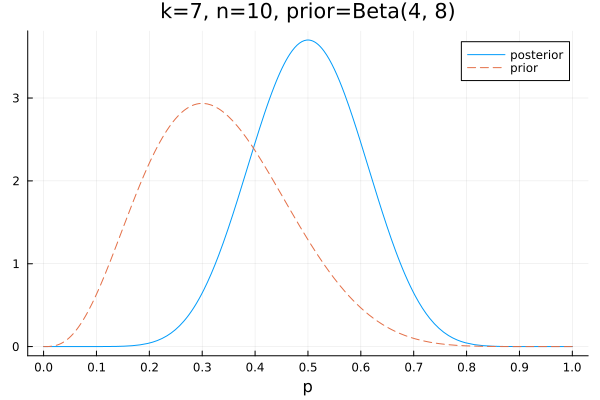

In [2]:
using Distributions
using StatsPlots
default(fmt=:png)

posterior_bin(k, n, prior_params) = Beta((prior_params .+ (k, n-k))...)

function plot_posterior_bin(k, n, prior_params)
    prior = Beta(prior_params...)
    posterior = posterior_bin(k, n, prior_params)
    plot(posterior; label="posterior")
    plot!(prior; label="prior", ls=:dash)
    plot!(xtick=0:0.1:1, xguide="p")
    title!("k=$k, n=$n, prior=Beta$prior_params")
end
plot_posterior_bin(7, 10, (4, 8))

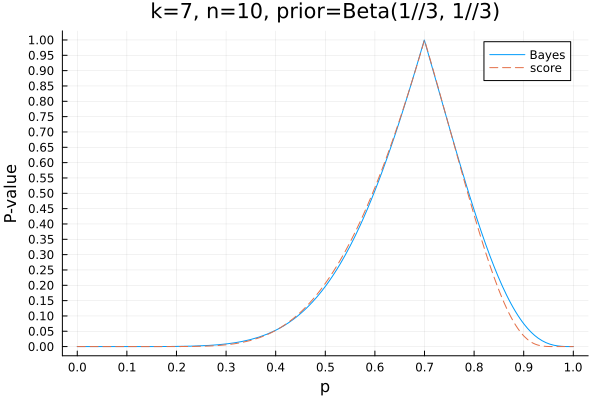

In [3]:
using Distributions
using StatsPlots
default(fmt=:png)

posterior_bin(k, n, prior_params) = Beta((prior_params .+ (k, n-k))...)

function pvalue_bayes(k, n, prior_params, p)
    posterior = posterior_bin(k, n, prior_params)
    min(1, 2cdf(posterior, p), 2ccdf(posterior, p))
end

function pvalue_score(k, n, p)
    phat = k/n
    normal = Normal(p, sqrt(p*(1-p)/n))
    min(1, 2cdf(normal, phat), 2ccdf(normal, phat))
end

function plot_pvalue_bin(k, n, prior_params)
    plot(p -> pvalue_bayes(k, n, prior_params, p), 0, 1; label="Bayes")
    plot!(p -> pvalue_score(k, n, p), 0, 1; label="score", ls=:dash)
    plot!(xtick=0:0.1:1, ytick=0:0.05:1)
    plot!(xguide="p", yguide="P-value")
    title!("k=$k, n=$n, prior=Beta$prior_params")
end

plot_pvalue_bin(7, 10, (1//3, 1//3))

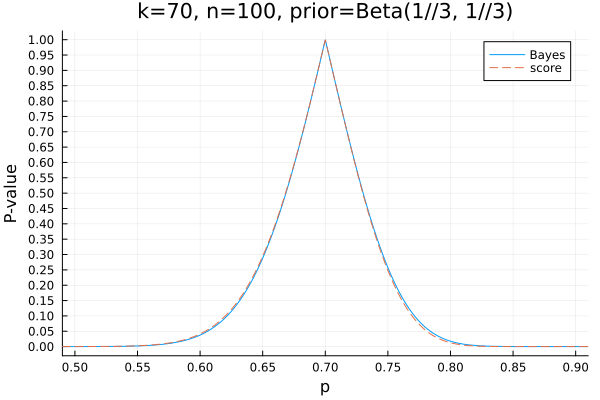

In [4]:
plot_pvalue_bin(70, 100, (1//3, 1//3))
plot!(xlim=(0.49, 0.91), xtick=0:0.05:1)

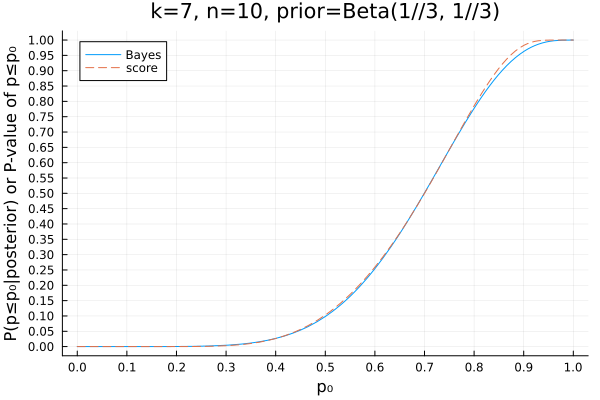

In [5]:
using Distributions
using StatsPlots
default(fmt=:png)

posterior_bin(k, n, prior_params) = Beta((prior_params .+ (k, n-k))...)

function pvalue_bayes_le(k, n, prior_params, p₀)
    posterior = posterior_bin(k, n, prior_params)
    cdf(posterior, p₀)
end

function pvalue_score_le(k, n, p₀)
    phat = k/n
    normal = Normal(p₀, sqrt(p₀*(1-p₀)/n))
    ccdf(normal, phat)
end

function plot_pvalue_bin_le(k, n, prior_params)
    plot(p₀ -> pvalue_bayes_le(k, n, prior_params, p₀), 0, 1; label="Bayes")
    plot!(p₀ -> pvalue_score_le(k, n, p₀), 0, 1; label="score", ls=:dash)
    plot!(xtick=0:0.1:1, ytick=0:0.05:1)
    plot!(xguide="p₀", yguide="P(p≤p₀|posterior) or P-value of p≤p₀")
    title!("k=$k, n=$n, prior=Beta$prior_params")
end

plot_pvalue_bin_le(7, 10, (1//3, 1//3))

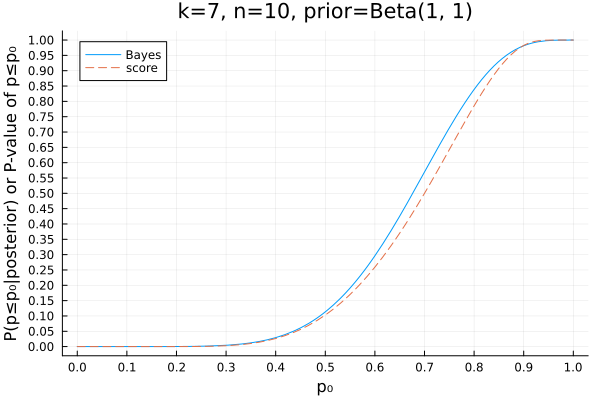

In [6]:
plot_pvalue_bin_le(7, 10, (1, 1))

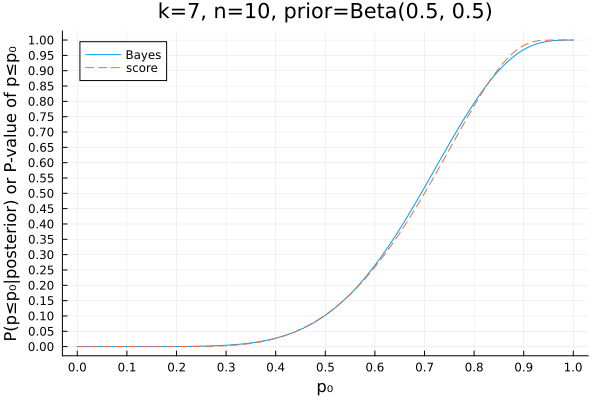

In [7]:
plot_pvalue_bin_le(7, 10, (1/2, 1/2))